# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pp
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | veles
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | victorica
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | katsuren-haebaru
Processing Record 7 of Set 1 | kelso
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | namibe
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | iskateley
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | vilyuchinsk
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | susuman
Processing Record 20 of Set 1 | lorengau
Processing Record 21 of Set 1 | sarandi del yi
Processing Record 2

Processing Record 38 of Set 4 | bamboo flat
Processing Record 39 of Set 4 | mirny
Processing Record 40 of Set 4 | road town
Processing Record 41 of Set 4 | loches
Processing Record 42 of Set 4 | enewetak
Processing Record 43 of Set 4 | inverell
Processing Record 44 of Set 4 | awjilah
Processing Record 45 of Set 4 | lastoursville
Processing Record 46 of Set 4 | roanoke rapids
Processing Record 47 of Set 4 | ujae
Processing Record 48 of Set 4 | thanh pho ba ria
City not found. Skipping...
Processing Record 49 of Set 4 | chonchi
Processing Record 0 of Set 5 | escanaba
Processing Record 1 of Set 5 | hirara
Processing Record 2 of Set 5 | prince rupert
Processing Record 3 of Set 5 | vadso
Processing Record 4 of Set 5 | howrah
Processing Record 5 of Set 5 | cidreira
Processing Record 6 of Set 5 | karratha
Processing Record 7 of Set 5 | ceerigaabo
Processing Record 8 of Set 5 | kuqa
Processing Record 9 of Set 5 | algona
Processing Record 10 of Set 5 | cabo san lucas
Processing Record 11 of Set

Processing Record 27 of Set 8 | harlingen
Processing Record 28 of Set 8 | gaiman
Processing Record 29 of Set 8 | shakawe
Processing Record 30 of Set 8 | kijang
Processing Record 31 of Set 8 | tyuratam
Processing Record 32 of Set 8 | arno
Processing Record 33 of Set 8 | santa helena de goias
Processing Record 34 of Set 8 | gebeit
Processing Record 35 of Set 8 | el-tor
Processing Record 36 of Set 8 | roswell
Processing Record 37 of Set 8 | nuuk
Processing Record 38 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 39 of Set 8 | les trois-bassins
Processing Record 40 of Set 8 | betio village
Processing Record 41 of Set 8 | waspan
Processing Record 42 of Set 8 | hamilton
Processing Record 43 of Set 8 | archangelos
Processing Record 44 of Set 8 | abepura
Processing Record 45 of Set 8 | ulladulla
Processing Record 46 of Set 8 | al bardiyah
Processing Record 47 of Set 8 | barkhan
Processing Record 48 of Set 8 | dwarka
Processing Record 49 of Set 8 | chazuta
Processing Record

Processing Record 12 of Set 12 | ormara
Processing Record 13 of Set 12 | dalandzadgad
Processing Record 14 of Set 12 | seven pagodas
Processing Record 15 of Set 12 | alesund
Processing Record 16 of Set 12 | arkalyk
Processing Record 17 of Set 12 | lilongwe
Processing Record 18 of Set 12 | inhambane
Processing Record 19 of Set 12 | weno
Processing Record 20 of Set 12 | quepos
Processing Record 21 of Set 12 | hancheng
Processing Record 22 of Set 12 | port hedland
Processing Record 23 of Set 12 | kuching
Processing Record 24 of Set 12 | happy valley-goose bay
Processing Record 25 of Set 12 | togur
Processing Record 26 of Set 12 | nizhneudinsk
Processing Record 27 of Set 12 | island harbour
Processing Record 28 of Set 12 | talnakh
Processing Record 29 of Set 12 | lamu
Processing Record 30 of Set 12 | contai
Processing Record 31 of Set 12 | norfolk
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,-2.72,93,100,4.00,RU,1683559725
1,veles,41.7156,21.7756,19.25,50,75,1.68,MK,1683559626
2,waitangi,-43.9535,-176.5597,14.90,95,100,1.79,NZ,1683559726
3,victorica,-36.2151,-65.4359,15.95,49,0,1.38,AR,1683559726
4,puerto ayora,-0.7393,-90.3518,29.98,94,64,3.13,EC,1683559726


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-2.72,93,100,4.00,RU,1683559725
1,veles,41.7156,21.7756,19.25,50,75,1.68,MK,1683559626
2,waitangi,-43.9535,-176.5597,14.90,95,100,1.79,NZ,1683559726
3,victorica,-36.2151,-65.4359,15.95,49,0,1.38,AR,1683559726
4,puerto ayora,-0.7393,-90.3518,29.98,94,64,3.13,EC,1683559726


In [8]:
#Convert the utc timestamp into a readable date
date_retrieval = datetime.utcfromtimestamp(city_data_df["Date"][0]).strftime('%Y-%m-%d')
print(date_retrieval)

2023-05-08


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

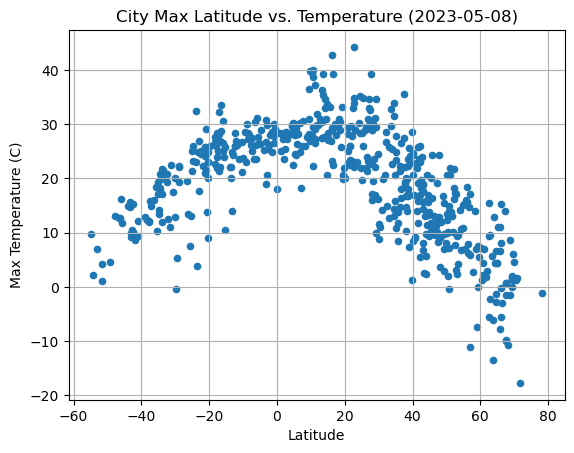

In [9]:
# Build scatter plot for latitude vs. temperature
lat_temp_overall = city_data_df.plot.scatter("Lat", "Max Temp", \
                                             title = f"City Max Latitude vs. Temperature ({date_retrieval})")

# Incorporate the other graph properties
lat_temp_overall.set_xlabel("Latitude")
lat_temp_overall.set_ylabel("Max Temperature (C)")
lat_temp_overall.grid("on")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

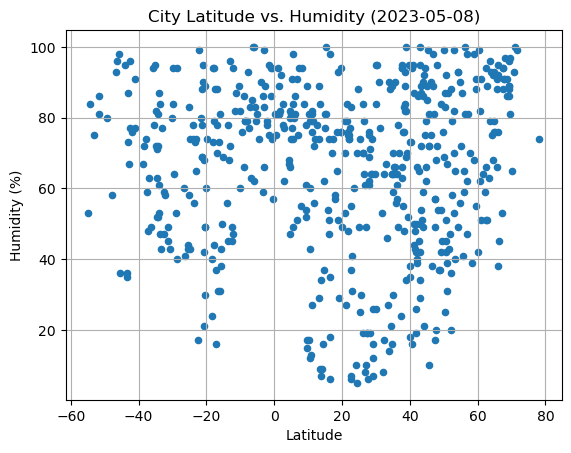

In [10]:
# Build the scatter plots for latitude vs. humidity
lat_humid_overall = city_data_df.plot.scatter("Lat", "Humidity", \
                                             title = f"City Latitude vs. Humidity ({date_retrieval})")

# Incorporate the other graph properties
lat_humid_overall.set_xlabel("Latitude")
lat_humid_overall.set_ylabel("Humidity (%)")
lat_humid_overall.grid("on")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

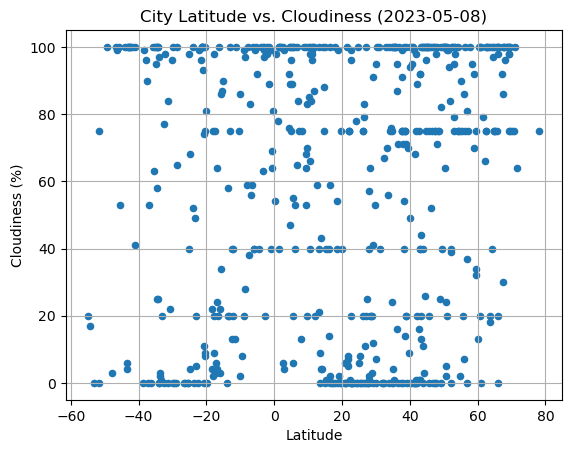

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloudiness_overall = city_data_df.plot.scatter("Lat", "Cloudiness", \
                                             title = f"City Latitude vs. Cloudiness ({date_retrieval})")

# Incorporate the other graph properties
lat_cloudiness_overall.set_xlabel("Latitude")
lat_cloudiness_overall.set_ylabel("Cloudiness (%)")
lat_cloudiness_overall.grid("on")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

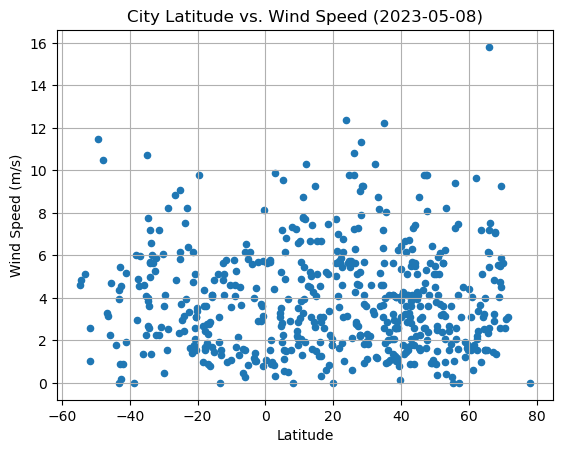

In [12]:
# Build the scatter plots for latitude vs. wind speed
lat_wind_speed_overall = city_data_df.plot.scatter("Lat", "Wind Speed", \
                                             title = f"City Latitude vs. Wind Speed ({date_retrieval})")

# Incorporate the other graph properties
lat_wind_speed_overall.set_xlabel("Latitude")
lat_wind_speed_overall.set_ylabel("Wind Speed (m/s)")
lat_wind_speed_overall.grid("on")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()



---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_reg(x_data, y_data, y_label, x_pos, y_pos):
    corr = x_data.corr(y_data)
    print(f"The r-value is {corr}")
    ax = plt.scatter(x_data, y_data)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    m, b = np.polyfit(x_data, y_data,1)
    x_axis = np.arange(min(x_data), max(x_data), .1)
    y_predict = [m*x+b for x in x_axis]
    plt.scatter(x_axis, y_predict, color = "red", s = 5)
    equation = f"y={round(m,2)}x+{round(b,2)}"
    plt.annotate(equation, xy=(x_pos, y_pos), xycoords='axes fraction', color = "red", fontsize = 15)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-2.72,93,100,4.00,RU,1683559725
1,veles,41.7156,21.7756,19.25,50,75,1.68,MK,1683559626
5,katsuren-haebaru,26.3369,127.8719,22.01,70,20,5.66,JP,1683559726
6,kelso,46.1468,-122.9084,11.07,90,100,3.09,US,1683559726
9,jamestown,42.0970,-79.2353,16.96,66,20,1.54,US,1683559553


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,14.90,95,100,1.79,NZ,1683559726
3,victorica,-36.2151,-65.4359,15.95,49,0,1.38,AR,1683559726
4,puerto ayora,-0.7393,-90.3518,29.98,94,64,3.13,EC,1683559726
7,grytviken,-54.2811,-36.5092,2.09,84,17,4.84,GS,1683559727
8,namibe,-15.1961,12.1522,25.75,69,90,4.86,AO,1683559727


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8120400978591463


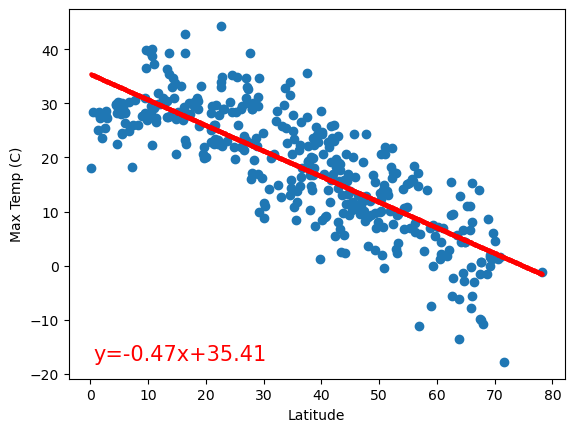

In [34]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp (C)", .05, 0.05)

The r-value is 0.7630361820301282


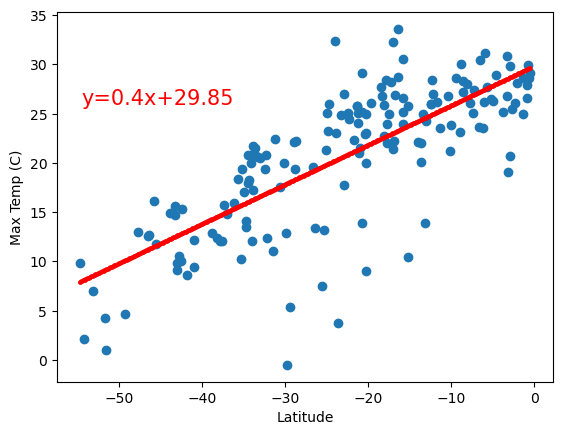

In [33]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp (C)", 0.05, .75)

**Discussion about the linear relationship:** Since the two correlation coefficients have a magnitude greater than .7, I would say that both of them are a strong correlation. The northern hemisphere has a strong negative correlation between latitude and temperature, and the southern hemisphere has a strong postitive correlation between latitude and temperature. We can summarize this by concluding that it does appear that the farther you are from the equator, the colder it is on average.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.1617708093796167


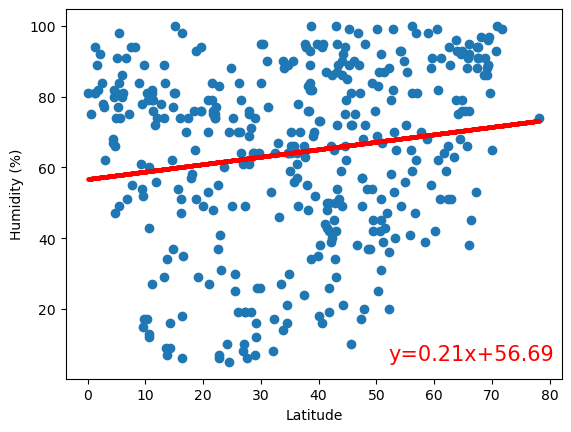

In [32]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity (%)", .65, .05)

The r-value is 0.1026952010751349


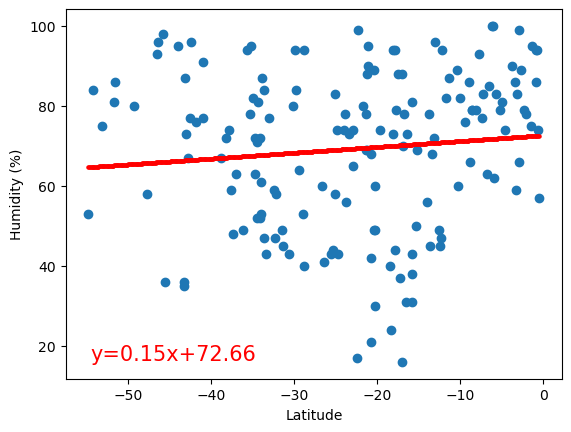

In [31]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity (%)", .05, .05)

**Discussion about the linear relationship:** Both correlation coefficients have a magnitude less than .2, so I would say there is a weak correlation between latitude and humidity. I would even go further to say that there is a very weak correlation, especially considering the appearance of the scatterplots.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.1642994529477481


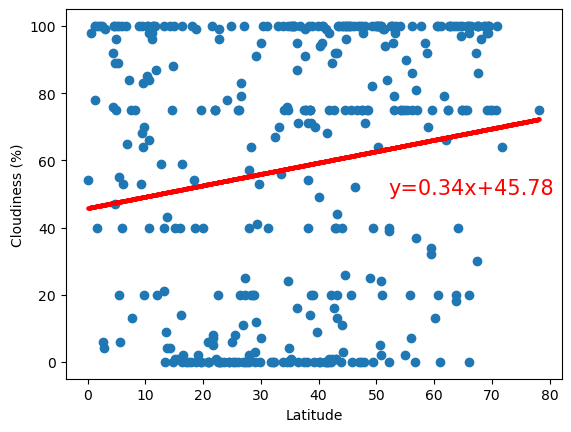

In [30]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness (%)", .65, .5)

The r-value is 0.0837410190311469


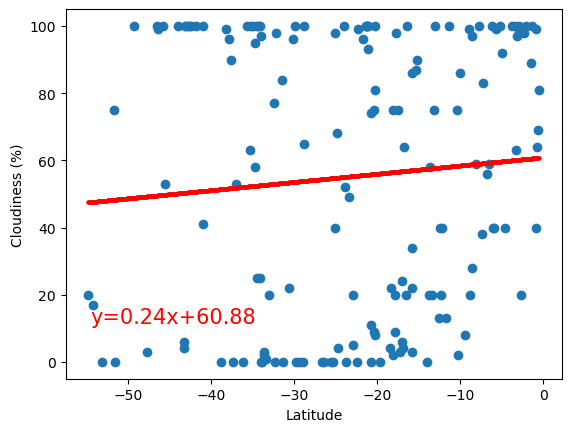

In [29]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness (%)", .05, .15)

**Discussion about the linear relationship:** The correlation coefficients have a magnitude less than .2, so there is a weak correlation between latitude and cloudiness. I would go further and conclude that there is a very weak correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.04895286284342614


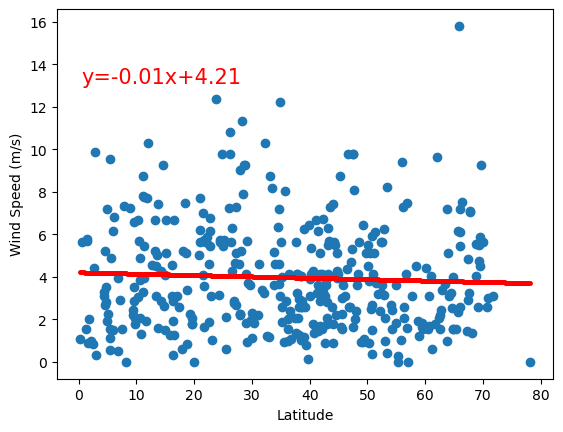

In [28]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed (m/s)", .05, .8)

The r-value is -0.15090631529375562


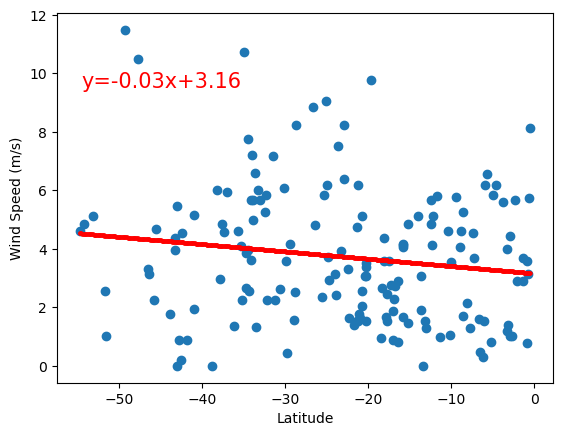

In [27]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed (m/s)", .05, .8)

**Discussion about the linear relationship:** The correlation coefficients have a magnitude less than .2, so I would say that the correlation between latitude and wind speed is very weak in both cases.